In [2]:
import pandas as pd
from sqlite3 import connect

conn = connect(r"C:\Users\DELL\Desktop\UMBC Academic\Cap\Data\archive\FPA_FOD_20170508.sqlite")

In [3]:
conn

In [4]:
data = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

In [5]:
data

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [6]:
for table in data['name']:
    try:
        in_data = pd.read_sql(sql = 'select * from '+table, con = conn)
        if table != 'SpatialIndex':
            print(table,in_data.shape)
    except:
        pass

spatial_ref_sys (4924, 6)
spatialite_history (16, 7)
sqlite_sequence (3, 2)
geometry_columns (1, 6)
spatial_ref_sys_aux (4873, 12)
views_geometry_columns (0, 6)
virts_geometry_columns (0, 5)
geometry_columns_statistics (1, 8)
views_geometry_columns_statistics (0, 8)
virts_geometry_columns_statistics (0, 8)
geometry_columns_field_infos (0, 14)
views_geometry_columns_field_infos (0, 14)
virts_geometry_columns_field_infos (0, 14)
geometry_columns_time (1, 5)
geometry_columns_auth (1, 4)
views_geometry_columns_auth (0, 3)
virts_geometry_columns_auth (0, 3)
sql_statements_log (0, 7)
Fires (1880465, 39)
idx_Fires_Shape (1880465, 5)
idx_Fires_Shape_node (72263, 2)
idx_Fires_Shape_rowid (1880465, 2)
idx_Fires_Shape_parent (72262, 2)
NWCG_UnitIDActive_20170109 (5867, 13)


In [7]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

#### Storing the raw/unprocessed data to the local disk

In [ ]:
fires_data.to_csv('fires_data.csv',index=False)

### Data Cleaning/ Preprocessing

In [ ]:
fires_data = pd.read_csv('fires_data.csv')

In [8]:
fires_data.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

Ommitting unncessary columns

In [9]:
fires_data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [10]:
omitting_columns = ['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME']

In [11]:
fires_data.drop(omitting_columns,axis=1, inplace=True)

In [12]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972173
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME           678148
Shape                    0
dtype: int64

In [13]:
fires_data.dtypes

FIRE_YEAR             int64
DISCOVERY_DATE      float64
DISCOVERY_DOY         int64
DISCOVERY_TIME       object
STAT_CAUSE_CODE     float64
STAT_CAUSE_DESCR     object
CONT_DATE           float64
CONT_DOY            float64
CONT_TIME            object
FIRE_SIZE           float64
FIRE_SIZE_CLASS      object
LATITUDE            float64
LONGITUDE           float64
OWNER_CODE          float64
OWNER_DESCR          object
STATE                object
COUNTY               object
FIPS_CODE            object
FIPS_NAME            object
Shape                object
dtype: object

Converting float discovery date and contained date to standard date

In [14]:
from datetime import datetime
def julian_to_standard(julian_date):
    if pd.isna(julian_date):
        return pd.NA
    else:
        return datetime.fromordinal(int(julian_date) - 1721425).date()
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'].apply(julian_to_standard))
fires_data['CONT_DATE'] = pd.to_datetime(fires_data['CONT_DATE'].apply(julian_to_standard))

In [15]:
fires_data['DISCOVERY_DATE']

0         2005-02-01
1         2004-05-11
2         2004-05-30
3         2004-06-27
4         2004-06-27
             ...    
1880460   2015-09-25
1880461   2015-10-04
1880462   2015-05-01
1880463   2015-10-13
1880464   2015-03-13
Name: DISCOVERY_DATE, Length: 1880465, dtype: datetime64[ns]

Extracting Month, weekday from the discovery date

In [16]:
fires_data['DISCOVERY_MONTH'] = fires_data['DISCOVERY_DATE'].dt.month

In [17]:
fires_data['DISCOVERY_DOW'] = fires_data['DISCOVERY_DATE'].dt.weekday

In [18]:
fires_data['DISCOVERY_TIME'] = pd.to_datetime(fires_data['DISCOVERY_TIME'], format='%H%M').dt.strftime('%H:%M:%S')# /'%I:%M %p'

In [19]:
fires_data['CONT_TIME'] = fires_data['CONT_TIME'].apply(lambda x:x if x!='' else pd.NA)

In [20]:
fires_data['CONT_TIME'] = pd.to_datetime(fires_data['CONT_TIME'], format='%H%M').dt.strftime('%H:%M:%S')# /'%I:%M %p'

In [21]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972553
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME           678148
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

In [22]:
## Code used to fill the county names based on latitudes and longitudes
'''
import geopandas as gpd
from shapely.geometry import Point

# Load the US county shapefile
counties_gdf = gpd.read_file(r"C:\Users\surya\Downloads\cb_2018_us_county_5m.shp")

# Example coordinates (replace with your actual data)
latitude = 40.017544
longitude = -105.283348

# Create a Point geometry from the coordinates
point = Point(longitude, latitude)

# Spatially query the county shapefile
county_info = counties_gdf[counties_gdf.geometry.contains(point)]

if not county_info.empty:
    county_name = county_info.iloc[0]["NAME"]
    print(f"County: {county_name}")
else:
    print("No county found for the given coordinates.")
    
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 125-126: truncated \UXXXXXXXX escape (1757063416.py, line 25)

In [23]:
##Filling county names using the saved checkpoint
checkpoint = pd.read_csv("checkpoint.csv")

fires_data.loc[fires_data['FIPS_NAME'].isna(), 'FIPS_NAME'] = checkpoint.loc[fires_data['FIPS_NAME'].isna(), 'COUNTY_NAMES']

C:\Users\DELL\AppData\Local\Temp\ipykernel_26340\1435290662.py:2: DtypeWarning: Columns (4,6,7,8,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  checkpoint = pd.read_csv("checkpoint.csv")


In [24]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972553
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME              620
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

In [25]:
fires_data.drop(['COUNTY'],axis=1,inplace=True)

In [26]:
fires_data.dropna(subset=['FIPS_NAME'],inplace=True)

In [27]:
fires_data.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882522
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           891355
CONT_DOY            891355
CONT_TIME           972329
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
FIPS_CODE           677528
FIPS_NAME                0
Shape                    0
DISCOVERY_MONTH          0
DISCOVERY_DOW            0
dtype: int64

Extracted duration_in_mins in time stamps from considering date and time from the fire occurances and containment

In [28]:
fires_data['CONT_TIME_STAMP'] = fires_data['CONT_DATE']+pd.to_timedelta(fires_data['CONT_TIME'])

In [29]:
fires_data['DISCOVERY_TIME_STAMP'] = fires_data['DISCOVERY_DATE']+pd.to_timedelta(fires_data['DISCOVERY_TIME'])

In [30]:
fires_data['DURATION_TIME_MINS'] = (fires_data['CONT_TIME_STAMP']-fires_data['DISCOVERY_TIME_STAMP']).dt.total_seconds()/60

In [31]:
fires_data['FIPS_CODE'] = fires_data.groupby('FIPS_NAME')['FIPS_CODE'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [32]:
fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          882522
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               891355
CONT_DOY                891355
CONT_TIME               972329
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                38446
FIPS_NAME                    0
Shape                        0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         972329
DISCOVERY_TIME_STAMP    882522
DURATION_TIME_MINS      988233
dtype: int64

In [33]:
fires_data.drop(['Shape'],axis=1, inplace=True)

fires_data.dropna(subset=['FIPS_CODE','FIPS_NAME'],inplace=True)

In [34]:
fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          856206
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               866903
CONT_DOY                866903
CONT_TIME               946057
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         946057
DISCOVERY_TIME_STAMP    856206
DURATION_TIME_MINS      961780
dtype: int64

In [35]:
fires_data[(fires_data['FIRE_SIZE']<=0.5) & (fires_data['DURATION_TIME_MINS']>=140)]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,OWNER_CODE,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,CONT_TIME_STAMP,DISCOVERY_TIME_STAMP,DURATION_TIME_MINS
0,2005,2005-02-01,33,13:00:00,9.0,Miscellaneous,2005-02-01,33.0,17:30:00,0.10,...,5.0,USFS,CA,063,Plumas,2,1,2005-02-01 17:30:00,2005-02-01 13:00:00,270.0
1,2004,2004-05-11,133,08:45:00,1.0,Lightning,2004-05-11,133.0,15:30:00,0.25,...,5.0,USFS,CA,061,Placer,5,1,2004-05-11 15:30:00,2004-05-11 08:45:00,405.0
3,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,14:00:00,0.10,...,5.0,USFS,CA,003,Alpine,6,6,2004-07-02 14:00:00,2004-06-27 16:00:00,7080.0
4,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,12:00:00,0.10,...,5.0,USFS,CA,003,Alpine,6,6,2004-07-02 12:00:00,2004-06-27 16:00:00,6960.0
5,2004,2004-06-29,182,18:00:00,1.0,Lightning,2004-06-30,183.0,16:00:00,0.10,...,5.0,USFS,CA,005,Amador,6,1,2004-06-30 16:00:00,2004-06-29 18:00:00,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880430,2014,2014-05-28,149,19:00:00,13.0,Missing/Undefined,2014-05-28,149.0,21:54:00,0.50,...,13.0,STATE OR PRIVATE,CA,073,San Diego,5,2,2014-05-28 21:54:00,2014-05-28 19:00:00,174.0
1880434,2015,2015-08-05,218,12:04:00,1.0,Lightning,2015-08-05,218.0,19:35:00,0.50,...,13.0,STATE OR PRIVATE,CA,007,Butte,8,2,2015-08-05 19:35:00,2015-08-05 12:04:00,451.0
1880437,2015,2015-05-10,131,16:45:00,5.0,Debris Burning,2015-05-10,131.0,20:00:00,0.02,...,13.0,STATE OR PRIVATE,CA,023,Humboldt,5,6,2015-05-10 20:00:00,2015-05-10 16:45:00,195.0
1880443,2015,2015-09-26,270,05:36:00,2.0,Equipment Use,2015-09-26,270.0,08:55:00,0.16,...,13.0,STATE OR PRIVATE,CA,035,Lassen,9,5,2015-09-26 08:55:00,2015-09-26 05:36:00,199.0


In [38]:
fires_data['DURATION_TIME_HRS'] = (fires_data['CONT_TIME_STAMP']-fires_data['DISCOVERY_TIME_STAMP']).dt.total_seconds()/3600

In [39]:
fires_data.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,CONT_TIME_STAMP,DISCOVERY_TIME_STAMP,DURATION_TIME_MINS,DURATION_TIME_HRS
0,2005,2005-02-01,33,13:00:00,9.0,Miscellaneous,2005-02-01,33.0,17:30:00,0.10,...,USFS,CA,063,Plumas,2,1,2005-02-01 17:30:00,2005-02-01 13:00:00,270.0,4.50
1,2004,2004-05-11,133,08:45:00,1.0,Lightning,2004-05-11,133.0,15:30:00,0.25,...,USFS,CA,061,Placer,5,1,2004-05-11 15:30:00,2004-05-11 08:45:00,405.0,6.75
2,2004,2004-05-30,152,19:21:00,5.0,Debris Burning,2004-05-30,152.0,20:24:00,0.10,...,STATE OR PRIVATE,CA,017,El Dorado,5,6,2004-05-30 20:24:00,2004-05-30 19:21:00,63.0,1.05
3,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,14:00:00,0.10,...,USFS,CA,003,Alpine,6,6,2004-07-02 14:00:00,2004-06-27 16:00:00,7080.0,118.00
4,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,12:00:00,0.10,...,USFS,CA,003,Alpine,6,6,2004-07-02 12:00:00,2004-06-27 16:00:00,6960.0,116.00


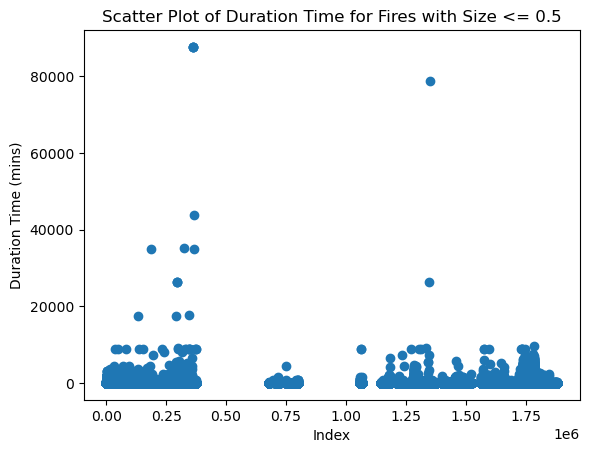

In [40]:

import matplotlib.pyplot as plt

# Assuming 'fires_data' is your DataFrame
# Filter the data for 'FIRE_SIZE' less than or equal to 0.5
filtered_data = fires_data[fires_data['FIRE_SIZE'] <= 0.5]

# Now create a scatter plot with the appropriate columns for x and y axes
plt.scatter(x=filtered_data.index, y=filtered_data['DURATION_TIME_HRS'])

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Duration Time (mins)')
plt.title('Scatter Plot of Duration Time for Fires with Size <= 0.5')

# Show the plot
plt.show()

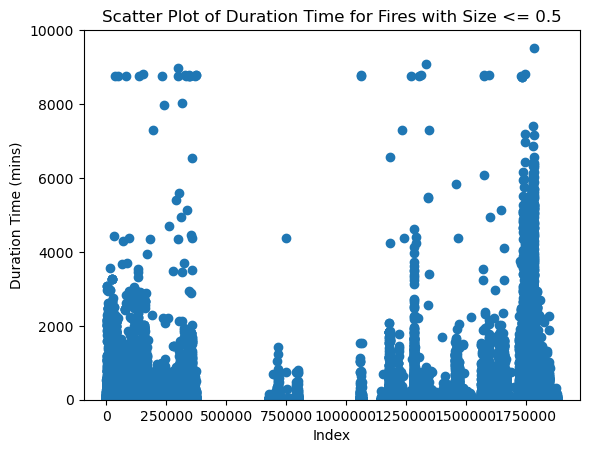

In [46]:
import matplotlib.pyplot as plt

filtered_data = fires_data[fires_data['FIRE_SIZE'] <= 0.5]

plt.scatter(x=filtered_data.index, y=filtered_data['DURATION_TIME_HRS'])
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Index')
plt.ylabel('Duration Time (mins)')
plt.ylim(0,10000)
plt.title('Scatter Plot of Duration Time for Fires with Size <= 0.5')

plt.show()

In [222]:
new_fires_data = fires_data[(fires_data['STAT_CAUSE_DESCR']!='Miscellaneous')&(fires_data['STAT_CAUSE_DESCR']!='Missing/Undefined')]

In [223]:
new_fires_data.shape

(1374303, 24)

In [224]:
new_fires_data['FIRE_SIZE'].max()

606945.0

In [225]:
new_fires_data[new_fires_data['FIRE_SIZE']>=50000]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,CONT_TIME_STAMP,DISCOVERY_TIME_STAMP,DURATION_TIME_MINS,DURATION_TIME_HRS
5008,2005,2005-05-28,149,19:15:00,1.0,Lightning,2005-10-14,288.0,18:00:00,77000.0,...,USFS,NM,003,Catron,5,5,2005-10-14 18:00:00,2005-05-28 19:15:00,200085.0,3334.750000
5095,2004,2004-05-14,136,12:50:00,1.0,Lightning,NaT,NaN,NaN,64488.0,...,USFS,NM,027,Lincoln,5,4,NaT,2004-05-14 12:50:00,NaN,524.895238
6808,2005,2005-07-15,197,19:09:00,1.0,Lightning,2005-07-23,205.0,19:00:00,72000.0,...,USFS,AZ,013,Maricopa,7,4,2005-07-23 19:00:00,2005-07-15 19:09:00,11511.0,191.850000
11658,2006,2006-06-18,170,11:00:00,4.0,Campfire,2006-08-22,235.0,07:30:00,55307.0,...,USFS,NM,003,Catron,6,6,2006-08-22 07:30:00,2006-06-18 11:00:00,93390.0,1556.500000
11746,2006,2006-06-07,159,18:23:00,1.0,Lightning,2006-08-08,221.0,07:00:00,58630.0,...,USFS,AZ,005,Coconino,6,2,2006-08-08 07:00:00,2006-06-07 18:23:00,88597.0,1476.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804814,2015,2015-06-18,170,15:30:00,1.0,Lightning,2015-06-27,179.0,16:30:00,54503.0,...,FWS,AK,290,Yukon-Koyukuk,6,3,2015-06-27 16:30:00,2015-06-18 15:30:00,13020.0,217.000000
1804864,2015,2015-06-21,173,20:00:00,1.0,Lightning,2015-06-29,181.0,23:45:00,55704.0,...,BLM,AK,050,Bethel,6,6,2015-06-29 23:45:00,2015-06-21 20:00:00,11745.0,195.750000
1804889,2015,2015-06-22,174,19:00:00,1.0,Lightning,2015-07-09,191.0,18:45:00,52108.5,...,STATE,AK,290,Yukon-Koyukuk,6,0,2015-07-09 18:45:00,2015-06-22 19:00:00,24465.0,407.750000
1804899,2015,2015-06-20,172,16:45:00,1.0,Lightning,2015-09-28,272.0,14:15:00,112806.8,...,FWS,AK,290,Yukon-Koyukuk,6,5,2015-09-28 14:15:00,2015-06-20 16:45:00,143850.0,2397.500000


Removing 384 rows which are of fire size being more than 50000, which are considered as outliers as their presence(in-terms of nummber of instances) is very less and statistically the variance is much higher from the median of the fire_size data

In [226]:
new_fires_data = new_fires_data[new_fires_data['FIRE_SIZE']<50000]

In [227]:
new_fires_data.shape

(1373919, 24)

In [228]:
fires_data['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       423978
Miscellaneous        321220
Arson                280746
Lightning            276921
Equipment Use        146162
Missing/Undefined    145876
Campfire              75030
Children              59111
Smoking               52340
Railroad              33221
Powerline             14018
Fireworks              9814
Structure              2962
Name: STAT_CAUSE_DESCR, dtype: int64

In [229]:
fires_data[fires_data['FIRE_SIZE']>50000]['STAT_CAUSE_DESCR'].value_counts()

Lightning            330
Miscellaneous         32
Missing/Undefined     22
Arson                 17
Campfire              14
Equipment Use         14
Debris Burning         3
Railroad               2
Powerline              2
Smoking                1
Structure              1
Name: STAT_CAUSE_DESCR, dtype: int64

Majority of the largest wildfires are due to Lightning

In [230]:
new_fires_data[new_fires_data['DURATION_TIME_HRS']>1000]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,CONT_TIME_STAMP,DISCOVERY_TIME_STAMP,DURATION_TIME_MINS,DURATION_TIME_HRS
1505,2005,2005-05-28,149,15:05:00,1.0,Lightning,2005-08-28,241.0,11:59:00,11936.00,...,USFS,NM,003,Catron,5,5,2005-08-28 11:59:00,2005-05-28 15:05:00,132294.0,2204.900000
2468,2005,2005-08-09,222,09:07:00,1.0,Lightning,2005-09-23,267.0,08:00:00,0.10,...,USFS,ID,049,Idaho,8,1,2005-09-23 08:00:00,2005-08-09 09:07:00,64733.0,1078.883333
2502,2005,2005-08-09,222,14:44:00,1.0,Lightning,2005-09-23,267.0,08:00:00,1.00,...,USFS,ID,049,Idaho,8,1,2005-09-23 08:00:00,2005-08-09 14:44:00,64396.0,1073.266667
2558,2005,2005-08-09,222,14:07:00,1.0,Lightning,2005-09-23,267.0,08:00:00,2.00,...,USFS,ID,049,Idaho,8,1,2005-09-23 08:00:00,2005-08-09 14:07:00,64433.0,1073.883333
2573,2005,2005-08-09,222,12:51:00,1.0,Lightning,2005-09-24,268.0,08:00:00,0.30,...,USFS,ID,049,Idaho,8,1,2005-09-24 08:00:00,2005-08-09 12:51:00,65949.0,1099.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860031,2015,2015-08-10,223,18:21:00,1.0,Lightning,NaT,NaN,NaN,1205.00,...,USFS,ID,049,Idaho,8,0,NaT,2015-08-10 18:21:00,NaN,1586.160133
1870731,2015,2015-08-27,240,15:02:00,7.0,Arson,NaT,NaN,NaN,0.01,...,MISSING/NOT SPECIFIED,CA,095,Solano,8,3,NaT,2015-08-27 15:02:00,NaN,2680.461111
1874535,2010,2010-07-17,199,02:38:00,1.0,Lightning,NaT,NaN,NaN,62.00,...,STATE OR PRIVATE,CA,107,Tulare,7,5,NaT,2010-07-17 02:38:00,NaN,1899.741667
1876275,2013,2013-08-12,225,22:15:00,7.0,Arson,NaT,NaN,NaN,0.10,...,MISSING/NOT SPECIFIED,CA,095,Solano,8,0,NaT,2013-08-12 22:15:00,NaN,2680.461111


In [231]:
fires_data['FIRE_SIZE'].std()

2470.5118804584445

In [232]:
new_fires_data['FIRE_SIZE'].std()

814.6013865670291

In [233]:
fires_data['DURATION_TIME_HRS'].std()

301.1921357319222

In [234]:
new_fires_data[((new_fires_data['FIRE_SIZE']<=0.5) & (new_fires_data['DURATION_TIME_HRS']<2160))]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,...,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,CONT_TIME_STAMP,DISCOVERY_TIME_STAMP,DURATION_TIME_MINS,DURATION_TIME_HRS
1,2004,2004-05-11,133,08:45:00,1.0,Lightning,2004-05-11,133.0,15:30:00,0.25,...,USFS,CA,061,Placer,5,1,2004-05-11 15:30:00,2004-05-11 08:45:00,405.0,6.750000
2,2004,2004-05-30,152,19:21:00,5.0,Debris Burning,2004-05-30,152.0,20:24:00,0.10,...,STATE OR PRIVATE,CA,017,El Dorado,5,6,2004-05-30 20:24:00,2004-05-30 19:21:00,63.0,1.050000
3,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,14:00:00,0.10,...,USFS,CA,003,Alpine,6,6,2004-07-02 14:00:00,2004-06-27 16:00:00,7080.0,118.000000
4,2004,2004-06-27,180,16:00:00,1.0,Lightning,2004-07-02,185.0,12:00:00,0.10,...,USFS,CA,003,Alpine,6,6,2004-07-02 12:00:00,2004-06-27 16:00:00,6960.0,116.000000
5,2004,2004-06-29,182,18:00:00,1.0,Lightning,2004-06-30,183.0,16:00:00,0.10,...,USFS,CA,005,Amador,6,1,2004-06-30 16:00:00,2004-06-29 18:00:00,1320.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880446,2015,2015-07-24,206,19:43:00,7.0,Arson,NaT,NaN,NaN,0.50,...,UNDEFINED FEDERAL,CA,071,San Bernardino,7,4,NaT,2015-07-24 19:43:00,NaN,0.133333
1880448,2015,2015-06-25,177,17:52:00,1.0,Lightning,2015-06-25,177.0,20:14:00,0.05,...,STATE OR PRIVATE,CA,035,Lassen,6,3,2015-06-25 20:14:00,2015-06-25 17:52:00,142.0,2.366667
1880450,2015,2015-06-26,178,03:37:00,7.0,Arson,NaT,NaN,NaN,0.10,...,UNDEFINED FEDERAL,CA,013,Contra Costa,6,4,NaT,2015-06-26 03:37:00,NaN,0.391667
1880452,2015,2015-04-13,104,08:27:00,5.0,Debris Burning,NaT,NaN,NaN,0.12,...,STATE OR PRIVATE,CA,037,Los Angeles,4,0,NaT,2015-04-13 08:27:00,NaN,1.055685


In [236]:
new_fires_data = new_fires_data[((new_fires_data['FIRE_SIZE']<=0.5) & (new_fires_data['DURATION_TIME_HRS']<=2160)) | (new_fires_data['FIRE_SIZE']>0.5)]

In [237]:
new_fires_data.shape

(1335154, 24)

In [238]:
new_fires_data['DURATION_TIME_HRS'].std()

204.71291308798536

In [239]:
new_fires_data.shape

(1335154, 24)

In [240]:
 new_fires_data = new_fires_data[(new_fires_data['DURATION_TIME_HRS']<=5000) | (new_fires_data['DURATION_TIME_HRS'].isna())]

In [241]:
new_fires_data.shape

(1335076, 24)

In [242]:
#### Filling null values in DURATION_TIME_HRS

In [244]:
fires_data['STATE'].value_counts()

CA    189423
GA    168861
TX    141889
NC    111235
FL     90248
SC     81314
NY     80853
MS     79186
AZ     71585
AL     66563
OR     61084
MN     44762
OK     43072
MT     38892
NM     37411
ID     36698
CO     34139
WA     33471
WI     31856
AR     31657
TN     31154
UT     30725
LA     29986
KY     27089
NJ     25949
SD     23895
WV     21967
VA     21732
MO     17953
NV     16956
ND     15187
WY     14166
ME     13145
MI     10485
HI      9889
PA      8710
KS      7644
AK      7049
NE      5619
CT      4976
IA      4118
MD      3607
OH      3453
MA      2614
NH      2452
IL      2310
PR      1775
IN      1517
RI       479
VT       456
DE       143
Name: STATE, dtype: int64

In [245]:
fires_data[fires_data['CONT_DATE'].isna()]['STATE'].value_counts()

TX    127813
CA     97606
NC     85195
GA     69626
FL     68323
SC     46984
MS     36781
AL     35506
LA     26708
MN     25432
NJ     22128
AR     21497
VA     17874
WI     16963
TN     16407
KY     13972
OK     12735
WA     12144
NY     11920
MO     11013
SD     10477
HI      9729
NM      9425
ID      6036
CO      5815
AZ      5231
WV      4393
UT      4139
PA      4126
MT      3806
CT      3747
MD      2681
ME      2673
MI      2522
NH      2065
OH      1939
NE      1806
WY      1760
PR      1561
AK      1404
ND       968
KS       949
IA       851
IL       546
IN       463
MA       361
OR       336
VT       196
RI       113
NV        81
DE        77
Name: STATE, dtype: int64

In [246]:
## for report/paper

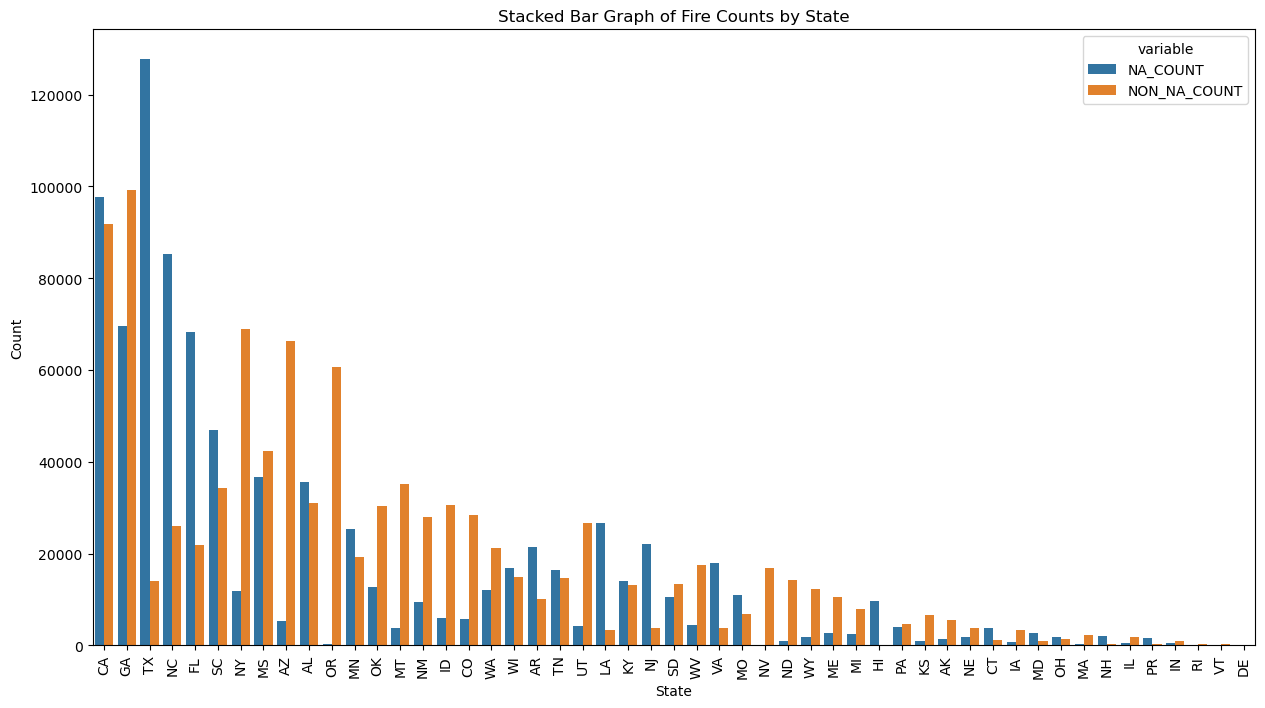

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'fires_data' is your DataFrame

# Get the value counts for both conditions
total_counts = fires_data['STATE'].value_counts()
na_counts = fires_data[fires_data['CONT_DATE'].isna()]['STATE'].value_counts()

# Convert the Series to DataFrames
total_counts_df = total_counts.reset_index()
na_counts_df = na_counts.reset_index()

# Rename the columns
total_counts_df.columns = ['STATE', 'TOTAL_COUNT']
na_counts_df.columns = ['STATE', 'NA_COUNT']

# Merge the two DataFrames on 'STATE'
merged_df = pd.merge(total_counts_df, na_counts_df, on='STATE', how='outer')

# Fill NaN values with 0 for accurate plotting
merged_df.fillna(0, inplace=True)

# Create a new column for the count of non-NA values
merged_df['NON_NA_COUNT'] = merged_df['TOTAL_COUNT'] - merged_df['NA_COUNT']

# Melt the DataFrame to have 'STATE', 'variable', and 'value' columns
melted_df = pd.melt(merged_df, id_vars='STATE', value_vars=['NA_COUNT', 'NON_NA_COUNT'])

# Create the stacked bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='STATE', y='value', hue='variable', data=melted_df)

# Enhance the plot
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Fire Counts by State')

# Show the plot
plt.show()


In [248]:
group_means = new_fires_data.groupby(['FIRE_SIZE_CLASS', 'STAT_CAUSE_CODE', 'STATE', 'FIPS_CODE'])['DURATION_TIME_HRS'].transform('mean')
new_fires_data['DURATION_TIME_HRS'].fillna(group_means,inplace=True)

In [249]:
new_fires_data.dropna(subset=['DURATION_TIME_HRS'],inplace=True)

In [250]:
new_fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          497096
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               516294
CONT_DOY                516294
CONT_TIME               552279
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         552279
DISCOVERY_TIME_STAMP    497096
DURATION_TIME_MINS      554007
DURATION_TIME_HRS            0
dtype: int64

In [251]:
new_fires_data.shape

(1252118, 24)

In [252]:
new_fires_data.drop(['DURATION_TIME_MINS','CONT_DOY'], axis=1, inplace=True)

In [253]:
new_fires_data.shape

(1252118, 22)

In [255]:
new_fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          497096
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               516294
CONT_TIME               552279
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         552279
DISCOVERY_TIME_STAMP    497096
DURATION_TIME_HRS            0
dtype: int64

In [257]:
new_fires_data.head().T

,1,2,3,4,5
FIRE_YEAR,2004,2004,2004,2004,2004
DISCOVERY_DATE,2004-05-11 00:00:00,2004-05-30 00:00:00,2004-06-27 00:00:00,2004-06-27 00:00:00,2004-06-29 00:00:00
DISCOVERY_DOY,133,152,180,180,182
DISCOVERY_TIME,08:45:00,19:21:00,16:00:00,16:00:00,18:00:00
STAT_CAUSE_CODE,1.0,5.0,1.0,1.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Lightning,Lightning,Lightning
CONT_DATE,2004-05-11 00:00:00,2004-05-30 00:00:00,2004-07-02 00:00:00,2004-07-02 00:00:00,2004-06-30 00:00:00
CONT_TIME,15:30:00,20:24:00,14:00:00,12:00:00,16:00:00
FIRE_SIZE,0.25,0.1,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A


In [264]:
new_fires_data.isna().sum()

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME          497096
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR             0
CONT_DATE               516294
CONT_TIME               552279
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
FIPS_CODE                    0
FIPS_NAME                    0
DISCOVERY_MONTH              0
DISCOVERY_DOW                0
CONT_TIME_STAMP         552279
DISCOVERY_TIME_STAMP    497096
DURATION_TIME_HRS            0
dtype: int64

In [265]:
new_fires_data.drop(['CONT_DATE','CONT_TIME','CONT_TIME_STAMP','DISCOVERY_TIME_STAMP'],axis=1, inplace=True)

In [266]:
new_fires_data.isna().sum()

FIRE_YEAR                 0
DISCOVERY_DATE            0
DISCOVERY_DOY             0
DISCOVERY_TIME       497096
STAT_CAUSE_CODE           0
STAT_CAUSE_DESCR          0
FIRE_SIZE                 0
FIRE_SIZE_CLASS           0
LATITUDE                  0
LONGITUDE                 0
OWNER_CODE                0
OWNER_DESCR               0
STATE                     0
FIPS_CODE                 0
FIPS_NAME                 0
DISCOVERY_MONTH           0
DISCOVERY_DOW             0
DURATION_TIME_HRS         0
dtype: int64

In [267]:
#do not drop the "DISCOVERY_TIME" as we can use it for plotting in EDA

In [268]:
new_fires_data.shape

(1252118, 18)

In [269]:
new_fires_data.to_csv("new_fires_data.csv",index=False)

# <center>EDA</center>

### <center>Univariate Analysis</center>

In [127]:
import pandas as pd
new_fires_data = pd.read_csv("new_fires_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13128\519960259.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new_fires_data = pd.read_csv("new_fires_data.csv")


In [128]:
new_fires_data.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'FIPS_NAME', 'DISCOVERY_MONTH', 'DISCOVERY_DOW',
       'DURATION_TIME_HRS'],
      dtype='object')

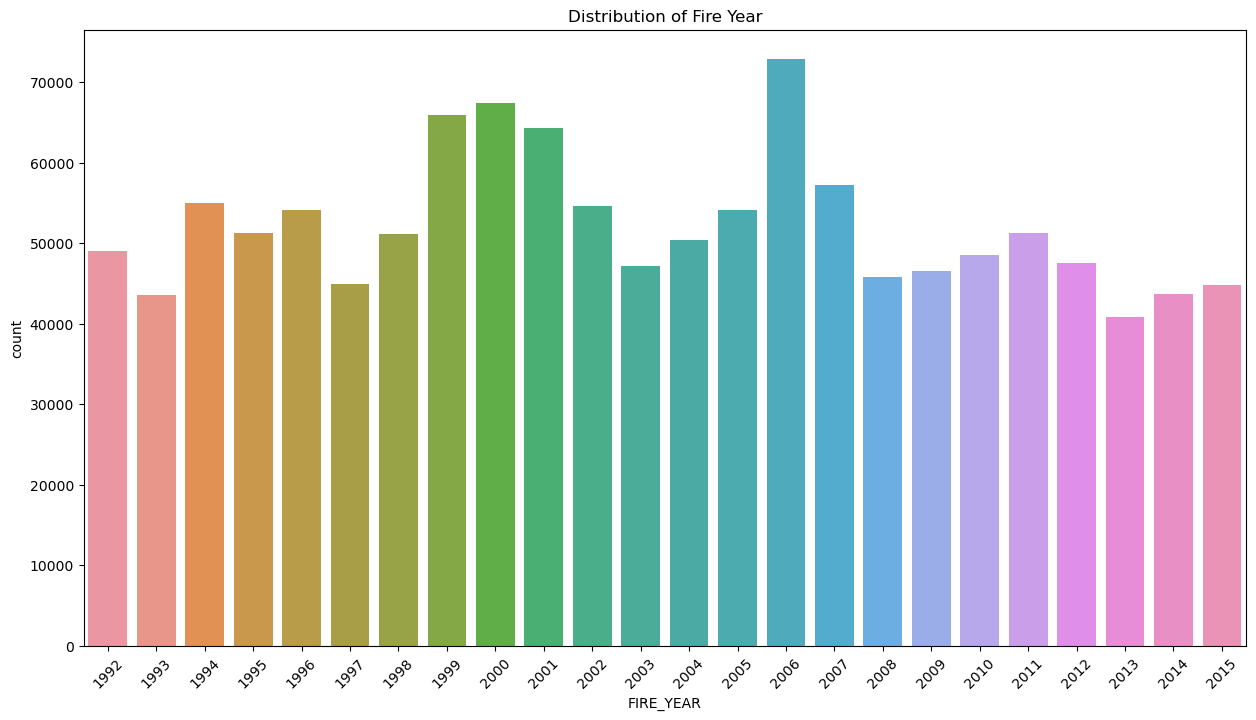

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(x='FIRE_YEAR', data=new_fires_data)
plt.title('Distribution of Fire Year')
plt.xticks(rotation=45)
plt.show()


In [130]:
new_fires_data.dtypes

FIRE_YEAR              int64
DISCOVERY_DATE        object
DISCOVERY_DOY          int64
DISCOVERY_TIME        object
STAT_CAUSE_CODE      float64
STAT_CAUSE_DESCR      object
FIRE_SIZE            float64
FIRE_SIZE_CLASS       object
LATITUDE             float64
LONGITUDE            float64
OWNER_CODE           float64
OWNER_DESCR           object
STATE                 object
FIPS_CODE              int64
FIPS_NAME             object
DISCOVERY_MONTH        int64
DISCOVERY_DOW          int64
DURATION_TIME_HRS    float64
dtype: object

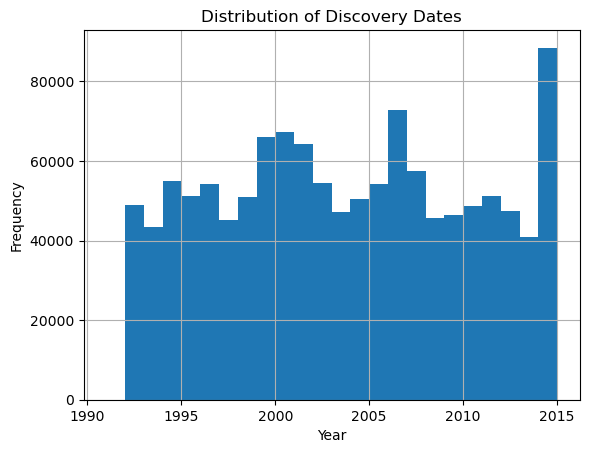

In [131]:
# Example for 'DISCOVERY_DATE'
new_fires_data['DISCOVERY_DATE'] = pd.to_datetime(new_fires_data['DISCOVERY_DATE'])
new_fires_data['DISCOVERY_DATE'].dt.year.hist(bins=range(int(new_fires_data['DISCOVERY_DATE'].dt.year.min()), int(new_fires_data['DISCOVERY_DATE'].dt.year.max())+1))
plt.title('Distribution of Discovery Dates')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


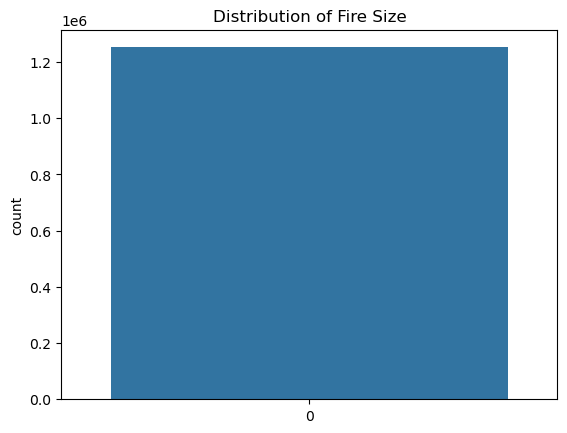

In [132]:
sns.countplot(new_fires_data['FIRE_SIZE'])
plt.title('Distribution of Fire Size')
plt.show()


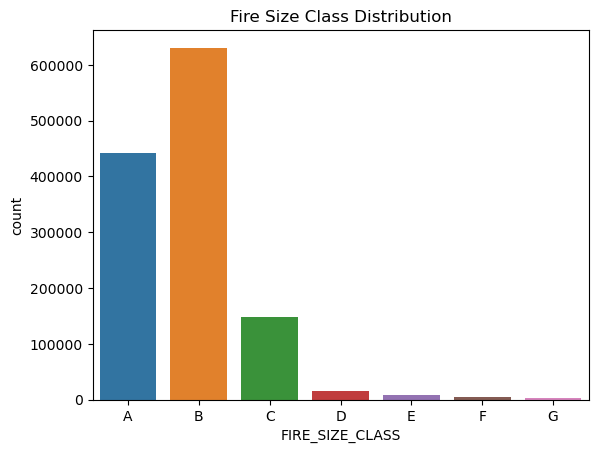

In [133]:
sns.countplot(x='FIRE_SIZE_CLASS', data=new_fires_data, order=sorted(new_fires_data['FIRE_SIZE_CLASS'].unique()))
plt.title('Fire Size Class Distribution')
plt.show()


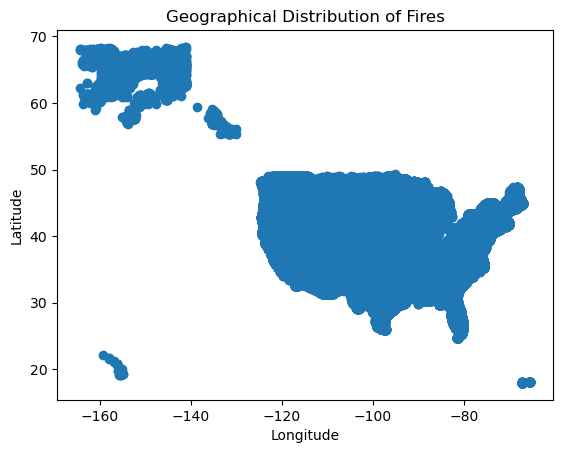

In [134]:
plt.scatter(new_fires_data['LONGITUDE'], new_fires_data['LATITUDE'])
plt.title('Geographical Distribution of Fires')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


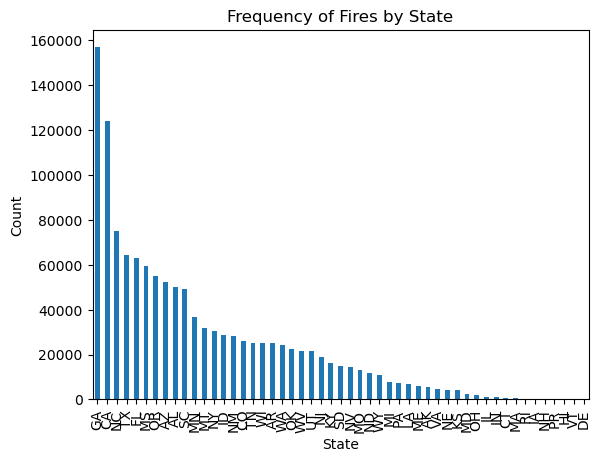

In [135]:
# Example for 'STATE'
state_counts = new_fires_data['STATE'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency of Fires by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


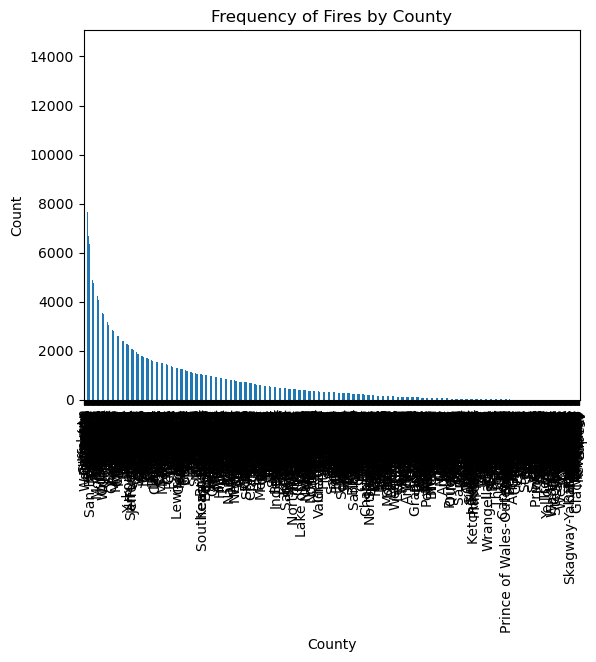

In [136]:
state_counts = new_fires_data['FIPS_NAME'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency of Fires by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


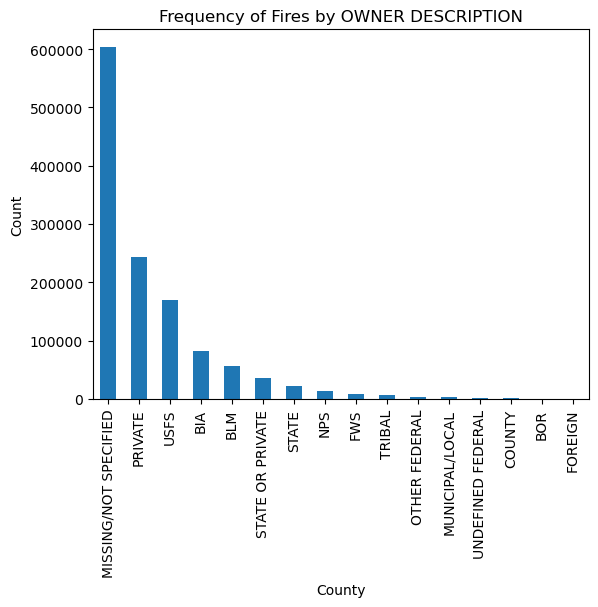

In [137]:
state_counts = new_fires_data['OWNER_DESCR'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency of Fires by OWNER DESCRIPTION')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


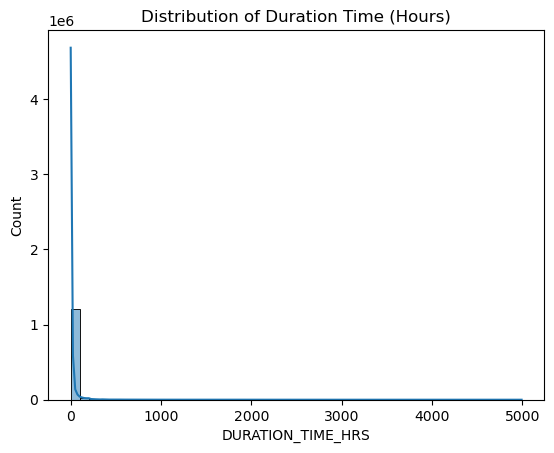

In [138]:
sns.histplot(new_fires_data['DURATION_TIME_HRS'], bins=50, kde=True)
plt.title('Distribution of Duration Time (Hours)')
plt.show()


### <center>Bivariate Analysis</center>

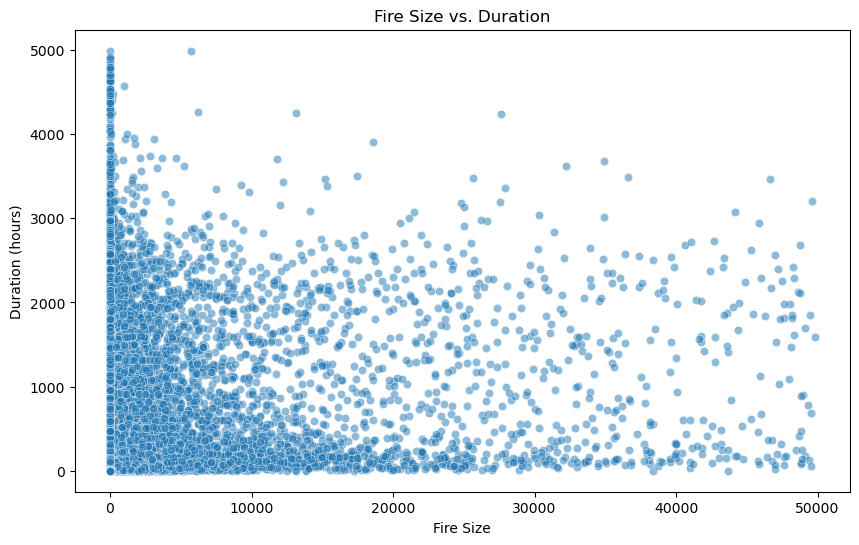

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_fires_data, x='FIRE_SIZE', y='DURATION_TIME_HRS', alpha=0.5)
plt.xlabel('Fire Size')
plt.ylabel('Duration (hours)')
plt.title('Fire Size vs. Duration')
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

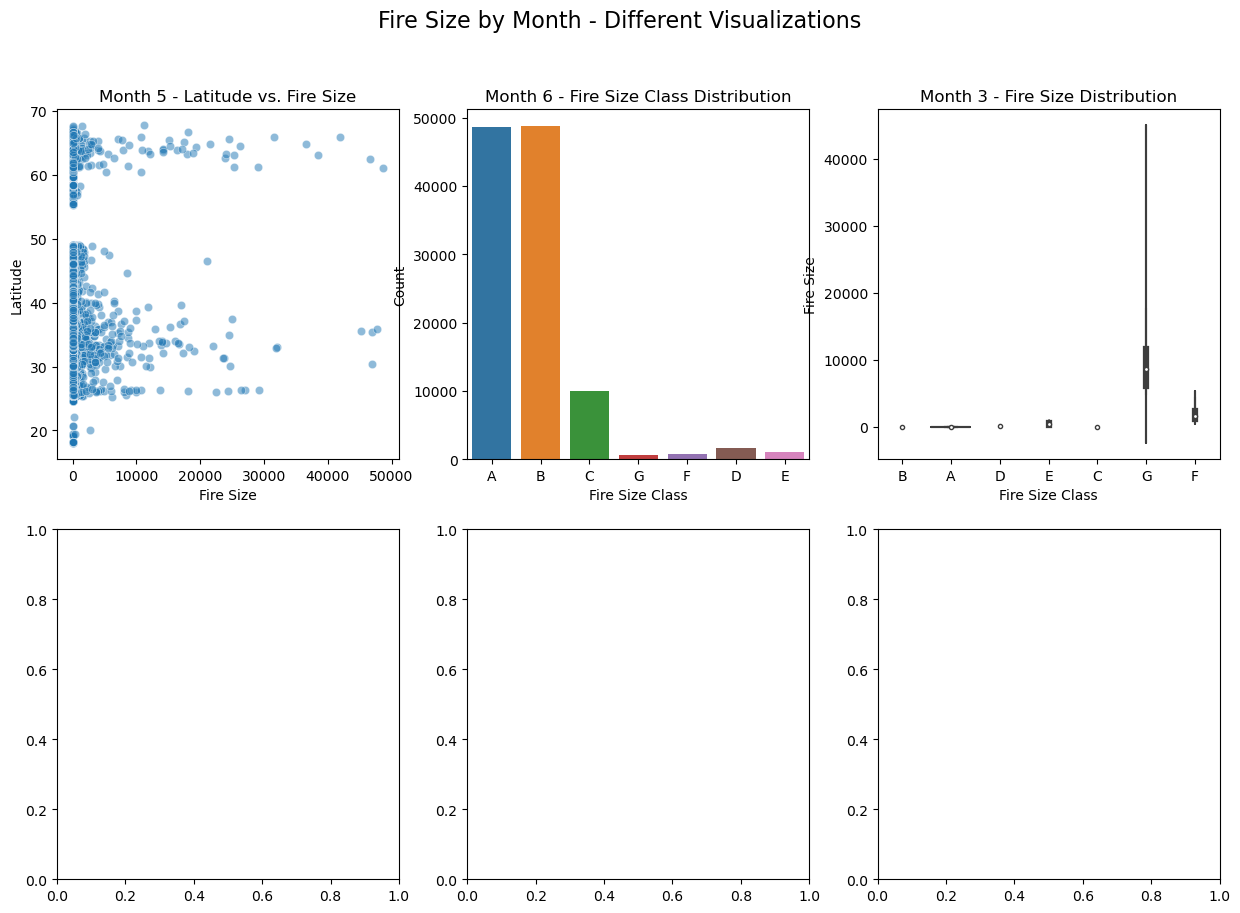

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'new_fires_data' is your DataFrame
months = new_fires_data['DISCOVERY_MONTH'].unique()
n_months = len(months)

# Create a 2x3 grid of subplots (you can adjust the grid size as needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Fire Size by Month - Different Visualizations', fontsize=16)

# Iterate through each month and create a different plot
for i, month in enumerate(months):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    # Select data for the current month
    month_data = new_fires_data[new_fires_data['DISCOVERY_MONTH'] == month]

    # Choose a different plot type for each month (e.g., scatter, bar, etc.)
    if i == 0:
        # Scatter plot
        sns.scatterplot(data=month_data, x='FIRE_SIZE', y='LATITUDE', ax=ax, alpha=0.5)
        ax.set_title(f'Month {month} - Latitude vs. Fire Size')
        ax.set_xlabel('Fire Size')
        ax.set_ylabel('Latitude')
    elif i == 1:
        # Bar plot
        sns.countplot(data=month_data, x='FIRE_SIZE_CLASS', ax=ax)
        ax.set_title(f'Month {month} - Fire Size Class Distribution')
        ax.set_xlabel('Fire Size Class')
        ax.set_ylabel('Count')
    elif i == 2:
        # Violin plot
        sns.violinplot(data=month_data, x='FIRE_SIZE_CLASS', y='FIRE_SIZE', ax=ax)
        ax.set_title(f'Month {month} - Fire Size Distribution')
        ax.set_xlabel('Fire Size Class')
        ax.set_ylabel('Fire Size')
    # Add more conditions for other plot types if needed

# Hide empty subplots (if any)
for i in range(n_months, 6):
    row, col = divmod(i, 3)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


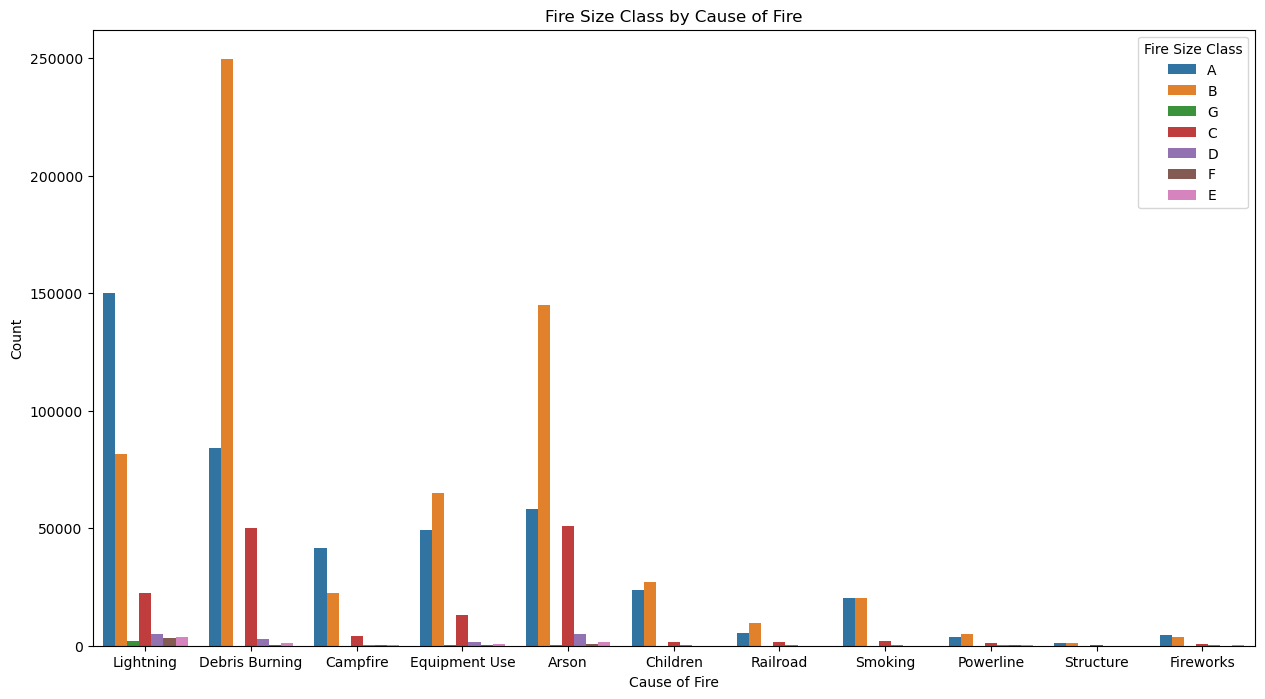

In [140]:
plt.figure(figsize=(15, 8))
sns.countplot(data=new_fires_data, x='STAT_CAUSE_DESCR', hue='FIRE_SIZE_CLASS')
plt.xlabel('Cause of Fire')
plt.ylabel('Count')
plt.title('Fire Size Class by Cause of Fire')
plt.legend(title='Fire Size Class')
plt.show()


In [141]:
new_fires_data.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'FIPS_NAME', 'DISCOVERY_MONTH', 'DISCOVERY_DOW',
       'DURATION_TIME_HRS'],
      dtype='object')

In [142]:
new_fires_data.head().T

,0,1,2,3,4
FIRE_YEAR,2004,2004,2004,2004,2004
DISCOVERY_DATE,2004-05-11 00:00:00,2004-05-30 00:00:00,2004-06-27 00:00:00,2004-06-27 00:00:00,2004-06-29 00:00:00
DISCOVERY_DOY,133,152,180,180,182
DISCOVERY_TIME,08:45:00,19:21:00,16:00:00,16:00:00,18:00:00
STAT_CAUSE_CODE,1.0,5.0,1.0,1.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Lightning,Lightning,Lightning
FIRE_SIZE,0.25,0.1,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,38.933056,38.984167,38.559167,38.559167,38.635278
LONGITUDE,-120.404444,-120.735556,-119.913333,-119.933056,-120.103611


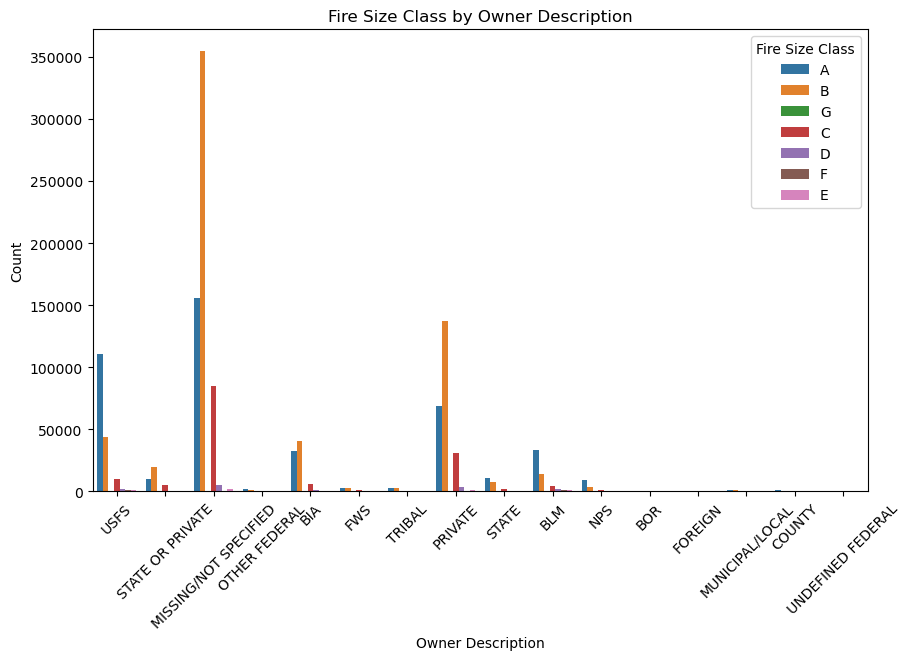

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_fires_data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=new_fires_data, x='OWNER_DESCR', hue='FIRE_SIZE_CLASS')
plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.legend(title='Fire Size Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


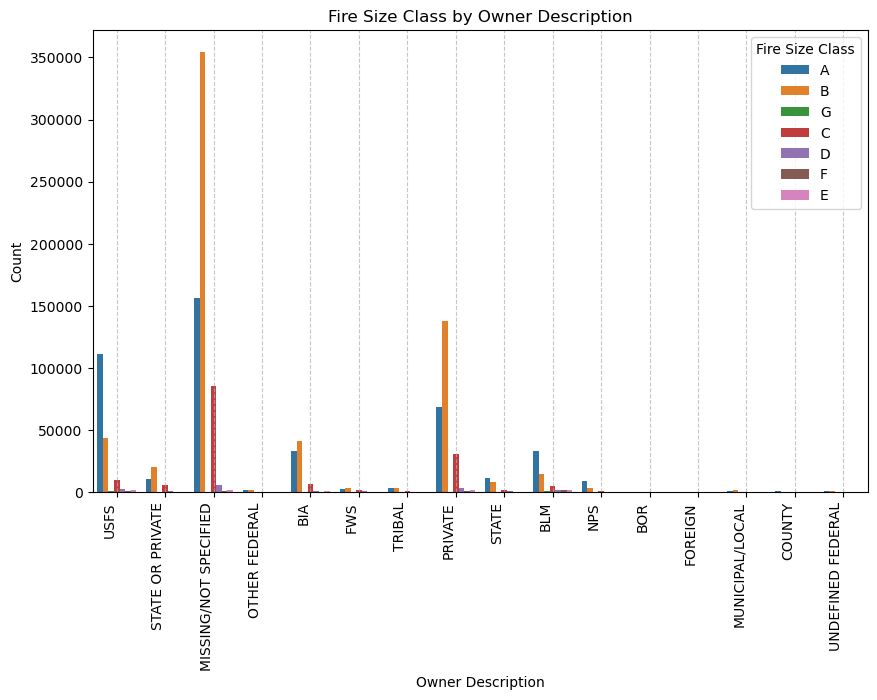

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_fires_data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=new_fires_data, x='OWNER_DESCR', hue='FIRE_SIZE_CLASS')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.legend(title='Fire Size Class')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.show()


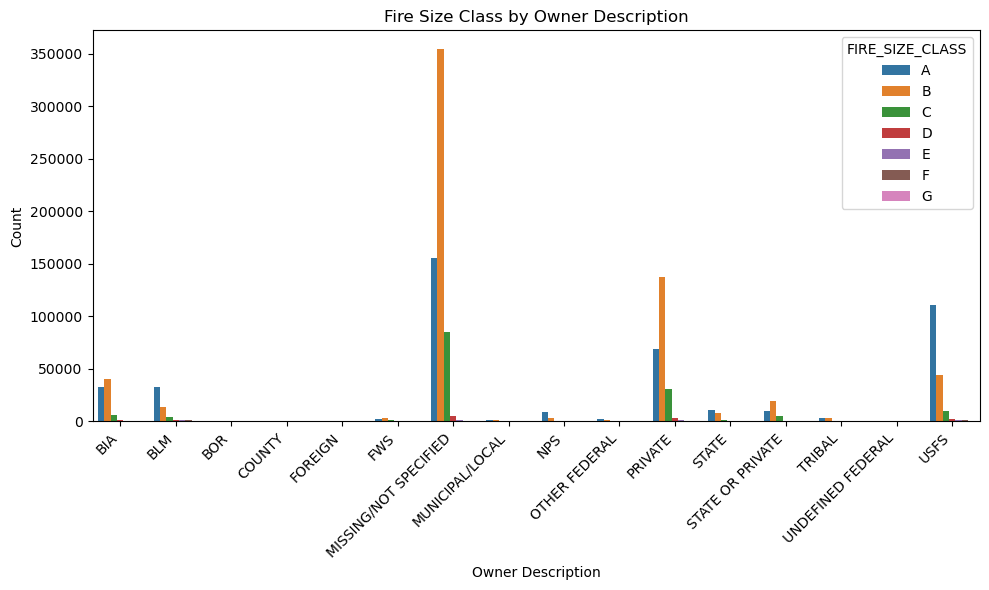

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_fires_data' is your DataFrame
plt.figure(figsize=(10, 6))

# Calculate the count of fire incidents for each owner description and fire size class
owner_counts = new_fires_data.groupby(['OWNER_DESCR', 'FIRE_SIZE_CLASS']).size().reset_index(name='Count')

# Create a bar plot
sns.barplot(data=owner_counts, x='OWNER_DESCR', y='Count', hue='FIRE_SIZE_CLASS')
plt.xlabel('Owner Description')
plt.ylabel('Count')
plt.title('Fire Size Class by Owner Description')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Add extra spacing between bars
plt.show()


In [146]:
new_fires_data.head().T

,0,1,2,3,4
FIRE_YEAR,2004,2004,2004,2004,2004
DISCOVERY_DATE,2004-05-11 00:00:00,2004-05-30 00:00:00,2004-06-27 00:00:00,2004-06-27 00:00:00,2004-06-29 00:00:00
DISCOVERY_DOY,133,152,180,180,182
DISCOVERY_TIME,08:45:00,19:21:00,16:00:00,16:00:00,18:00:00
STAT_CAUSE_CODE,1.0,5.0,1.0,1.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Lightning,Lightning,Lightning
FIRE_SIZE,0.25,0.1,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,38.933056,38.984167,38.559167,38.559167,38.635278
LONGITUDE,-120.404444,-120.735556,-119.913333,-119.933056,-120.103611


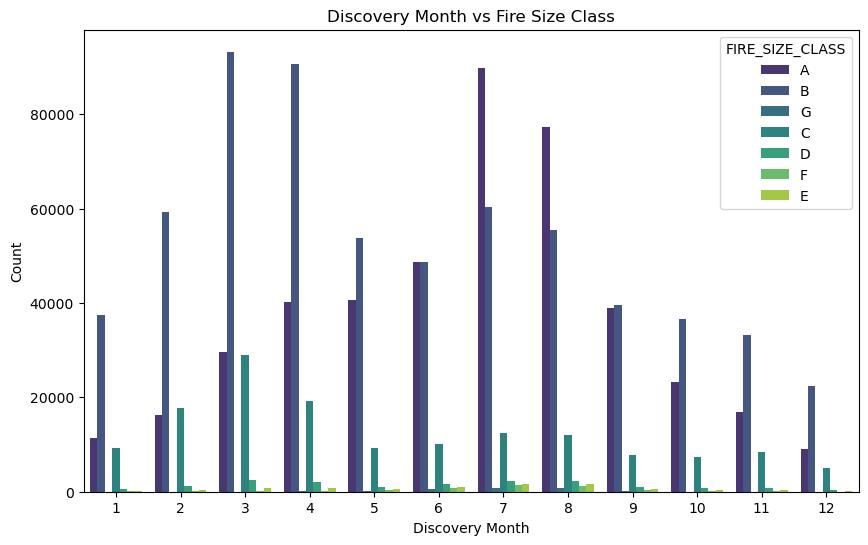

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is a pandas DataFrame containing your dataset
# Replace 'data' with the actual name of your DataFrame

# Convert 'DISCOVERY_MONTH' to a categorical type for better plotting
new_fires_data['DISCOVERY_MONTH'] = pd.Categorical(new_fires_data['DISCOVERY_MONTH'])

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='DISCOVERY_MONTH', hue='FIRE_SIZE_CLASS', data=new_fires_data, palette='viridis')

# Set the title and labels
plt.title('Discovery Month vs Fire Size Class')
plt.xlabel('Discovery Month')
plt.ylabel('Count')

# Display the plot
plt.show()


In [1]:
import pandas as pd
new_fires_data = pd.read_csv("new_fires_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_21156\519960259.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new_fires_data = pd.read_csv("new_fires_data.csv")


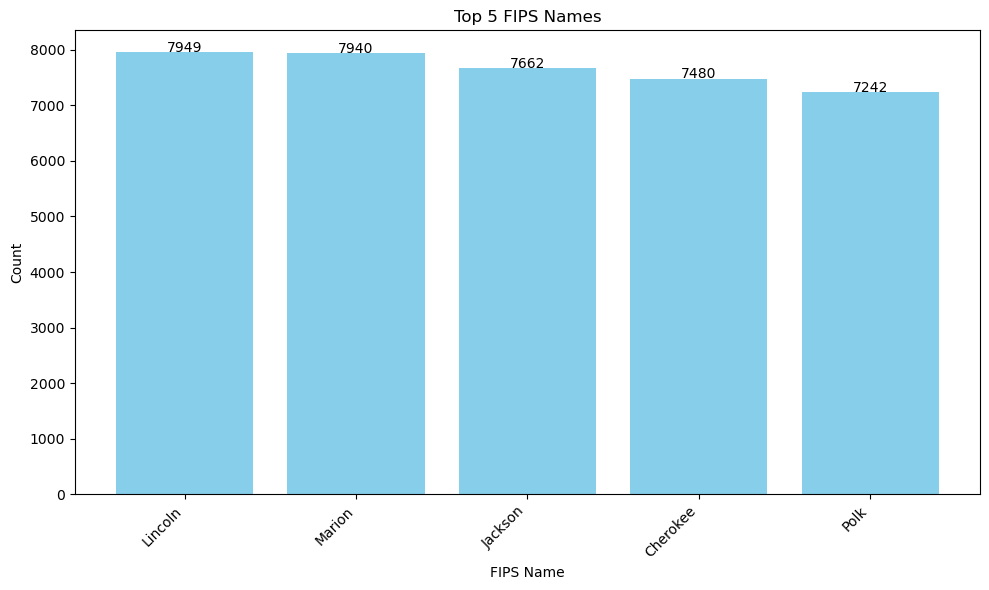

In [216]:
fips_name_counts = new_fires_data['FIPS_NAME'].value_counts().head(5)

# Create a bar plot for the top 5 FIPS_NAME values
plt.figure(figsize=(10, 6))
plt.bar(fips_name_counts.index, fips_name_counts.values, color='skyblue')
plt.title('Top 5 FIPS Names')
plt.xlabel('FIPS Name')
plt.ylabel('Count')

# Add values on top of each bar
for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

## <center>Model</center>

In [211]:
from datetime import datetime
def get_am_pm(time_str):
    try:
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
    except:
        return pd.NA
    return time_obj.strftime('%p')

In [212]:
new_fires_data['DISCOVERY_AM_PM'] = new_fires_data['DISCOVERY_TIME'].apply(lambda x: get_am_pm(str(x)))

In [213]:
new_fires_data = new_fires_data[((new_fires_data['FIRE_SIZE']<=0.2)&(new_fires_data['DURATION_TIME_HRS']<=24))|(new_fires_data['FIRE_SIZE']>0.2)]

In [214]:
new_fires_data = new_fires_data[new_fires_data['FIRE_SIZE']>0.1]

In [215]:
new_fires_data.head().T

,0,6,7,11,12
FIRE_YEAR,2004,2005,2005,2004,2004
DISCOVERY_DATE,2004-05-11,2005-03-07,2005-03-14,2004-09-27,2004-10-02
DISCOVERY_DOY,133,67,74,272,277
DISCOVERY_TIME,08:45:00,13:00:00,12:00:00,12:00:00,06:30:00
STAT_CAUSE_CODE,1.0,5.0,5.0,4.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Debris Burning,Campfire,Lightning
FIRE_SIZE,0.25,0.8,1.0,6.0,0.2
FIRE_SIZE_CLASS,A,B,B,B,A
LATITUDE,38.933056,40.968056,41.233611,38.433333,38.675833
LONGITUDE,-120.404444,-122.433889,-122.283333,-120.51,-120.279722


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [8]:
new_fires_data.shape

(905131, 19)

In [190]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

In [191]:
model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [192]:
model_data.drop('DURATION_TIME_HRS', axis=1, inplace=True)

In [193]:
model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)

In [194]:
X = model_data.drop('FIRE_SIZE', axis=1)
y = model_data['FIRE_SIZE']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [196]:
model_data.dtypes

FIRE_YEAR             int64
STAT_CAUSE_DESCR     object
FIRE_SIZE           float64
OWNER_DESCR          object
STATE                object
FIPS_CODE             int64
DISCOVERY_MONTH       int64
DISCOVERY_DOW         int64
dtype: object

In [197]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [198]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [199]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [200]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### <center>FIRE SIZE PREDICTION</center>

In [201]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [202]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [203]:
X_train

,FIRE_YEAR,STAT_CAUSE_DESCR,OWNER_DESCR,STATE,FIPS_CODE,DISCOVERY_MONTH,DISCOVERY_DOW
252374,2007,Lightning,BIA,NM,6,7,3
1213000,2015,Structure,BIA,MT,3,5,0
1036251,2011,Debris Burning,PRIVATE,GA,33,5,2
804447,2006,Arson,MISSING/NOT SPECIFIED,AL,39,3,0
221307,2004,Arson,BIA,ND,5,4,6
...,...,...,...,...,...,...,...
430155,1995,Arson,MISSING/NOT SPECIFIED,NJ,29,5,6
557490,1994,Debris Burning,MISSING/NOT SPECIFIED,MI,39,5,4
252622,2000,Lightning,BIA,AZ,1,4,5
940562,2009,Debris Burning,PRIVATE,AR,129,3,0


In [205]:
from sklearn.metrics import mean_squared_error
import numpy as np
linear_model_rmse = mean_squared_error(model.predict(X_test),y_test)**(1/2)
print("RMSE Linear Model:", linear_model_rmse)

RMSE Linear Model: 996.8417459143595


In [206]:
y_test

361976      1.20
384500      1.00
1059636    63.00
1066905     2.00
720660      2.00
           ...  
803889      5.00
433314      0.25
48790       0.30
1031147     5.00
436286      0.25
Name: FIRE_SIZE, Length: 226283, dtype: float64

In [207]:
model.predict(X_test)

array([-10.99557565,  -4.90978562,  51.91176924, ...,  52.11837002,
        22.46531817,   3.33602238])

### <center>Implementing GridSearch</center>

In [208]:
from sklearn.model_selection import cross_val_score, GridSearchCV


scores = cross_val_score(model, X_test, y_test, cv=2)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.03607597 0.04681628]


In [217]:
parameters = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, parameters, cv=2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]})

In [218]:
best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Test set score of the best model: 0.040908753156791544


In [219]:
best_model.predict(X_test)

array([-10.99571385,  -5.03744641,  51.89257332, ...,  52.19341324,
        21.63959554,   3.27368852])

In [220]:
y_test

361976      1.20
384500      1.00
1059636    63.00
1066905     2.00
720660      2.00
           ...  
803889      5.00
433314      0.25
48790       0.30
1031147     5.00
436286      0.25
Name: FIRE_SIZE, Length: 226283, dtype: float64

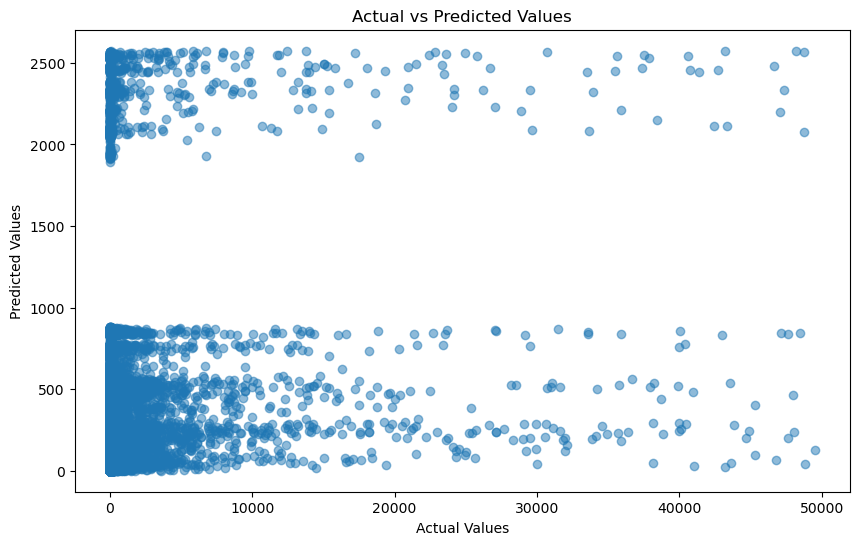

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, abs(best_model.predict(X_test)), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

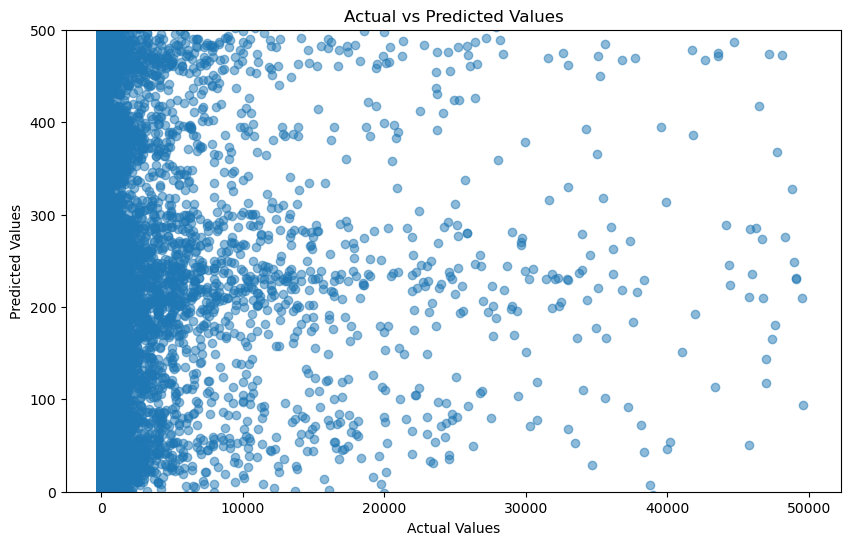

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(0,500)
plt.show()


In [223]:
best_model = grid_search.best_estimator_

In [224]:
y_test

361976      1.20
384500      1.00
1059636    63.00
1066905     2.00
720660      2.00
           ...  
803889      5.00
433314      0.25
48790       0.30
1031147     5.00
436286      0.25
Name: FIRE_SIZE, Length: 226283, dtype: float64

In [225]:
best_model.predict(X_test)

array([-10.99571385,  -5.03744641,  51.89257332, ...,  52.19341324,
        21.63959554,   3.27368852])

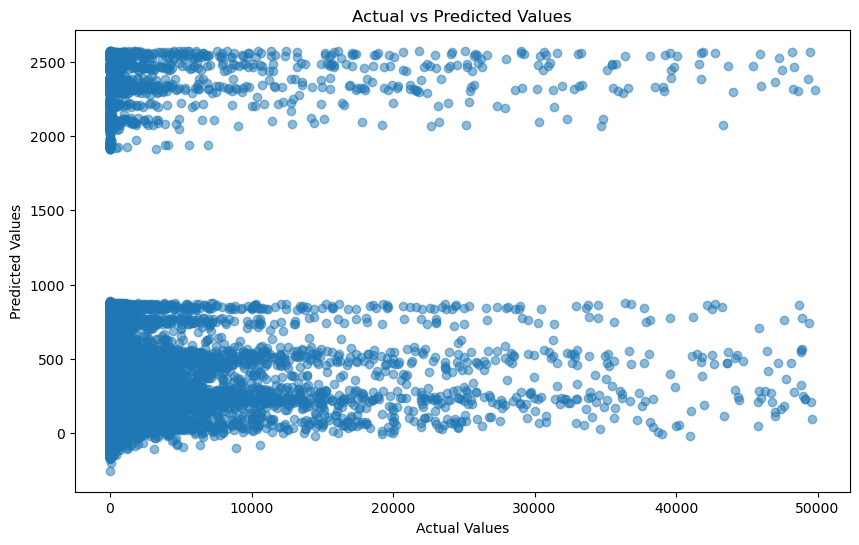

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [227]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [None, 3, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))
])

In [228]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))])

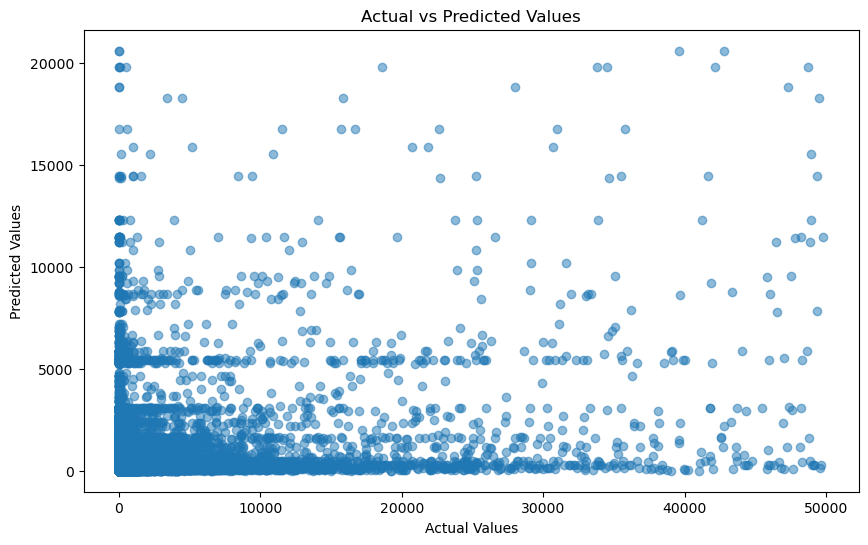

In [241]:
best_model = tree_pipeline

y_test

best_model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


In [231]:
print("Decision Tree RMSE: ",mean_squared_error(best_model.predict(X_test),y_test)**(1/2))

Decision Tree RMSE:  997.7277827925636


In [232]:
# Define a pipeline for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=20,n_estimators=10))
])
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=10))])

In [238]:
print("Random Forest RMSE: ",mean_squared_error(forest_pipeline.predict(X_test),y_test)**(1/2))

Random Forest RMSE:  1079.2160884038663


In [239]:
best_model = forest_pipeline

y_test


361976      1.20
384500      1.00
1059636    63.00
1066905     2.00
720660      2.00
           ...  
803889      5.00
433314      0.25
48790       0.30
1031147     5.00
436286      0.25
Name: FIRE_SIZE, Length: 226283, dtype: float64

In [240]:

best_model.predict(X_test)


array([ 4.354716  ,  7.57646488, 53.93596435, ...,  9.07199044,
       13.69898975,  5.37414646])

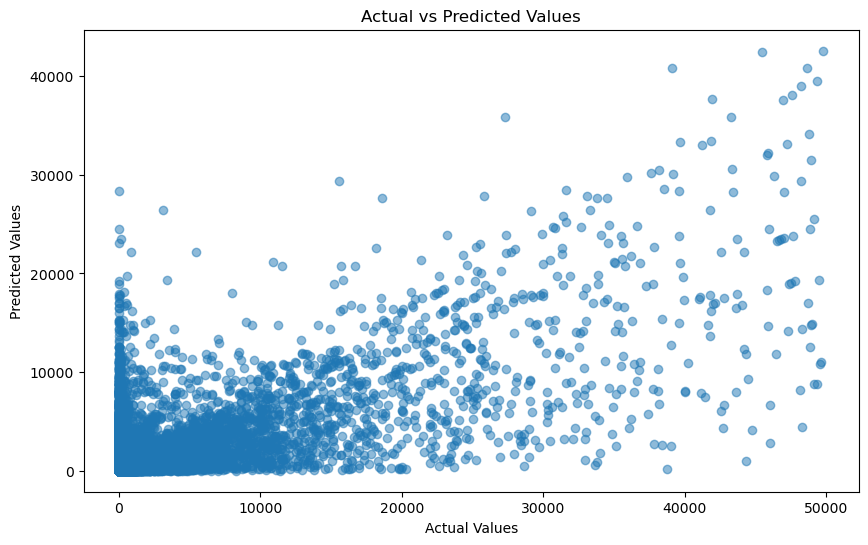

In [236]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### <center>FIRE DURATION PREDICTION</center>

In [242]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [243]:


model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)

X = model_data.drop('DURATION_TIME_HRS', axis=1)
y = model_data['DURATION_TIME_HRS']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [245]:

model_data.dtypes


FIRE_YEAR              int64
STAT_CAUSE_DESCR      object
FIRE_SIZE            float64
OWNER_DESCR           object
STATE                 object
FIPS_CODE              int64
DISCOVERY_MONTH        int64
DISCOVERY_DOW          int64
DURATION_TIME_HRS    float64
dtype: object

In [246]:

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [247]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [248]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [249]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [250]:

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [251]:
from sklearn.metrics import mean_squared_error
import numpy as np
fire_duration_lr_rmse = mean_squared_error(model.predict(X_test),y_test)**(1/2)

In [252]:
fire_duration_lr_rmse

138.59938617955757

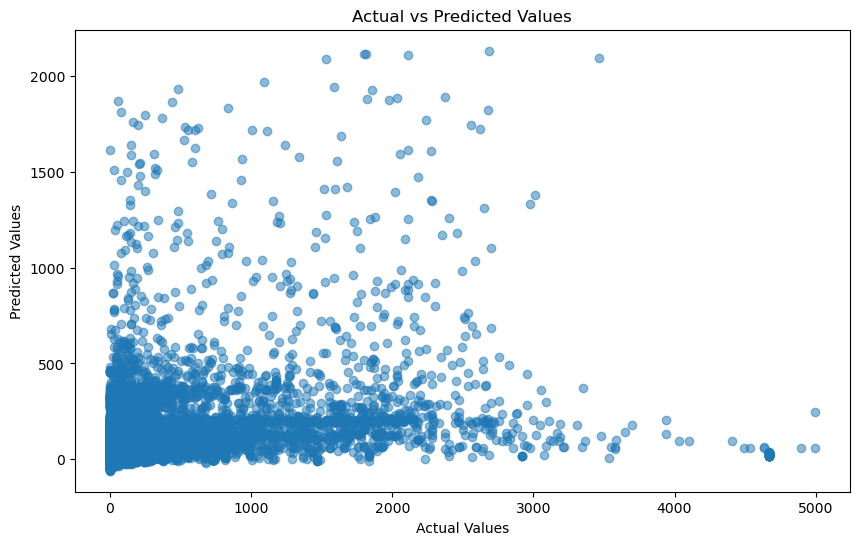

In [254]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [255]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [None, 3, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))
])

In [256]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))])

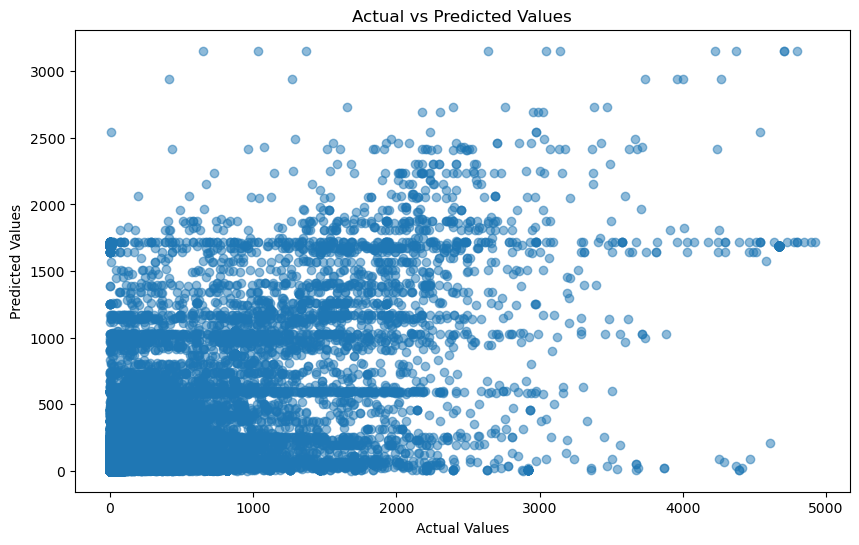

In [257]:
best_model = tree_pipeline

y_test

best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [258]:
fire_duration_dt_rmse = mean_squared_error(tree_pipeline.predict(X_test),y_test)**(1/2)

In [259]:
fire_duration_dt_rmse

113.6359606444829

In [261]:
# Define a pipeline for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=20, n_estimators=10))
])
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=10))])

In [262]:
best_model = forest_pipeline
y_test

361976       1.078768
384500       0.796154
1059636      4.683333
1066905      1.972222
720660       2.082112
              ...    
803889       0.300000
433314      48.566369
48790        5.500000
1031147      2.066667
436286     107.544028
Name: DURATION_TIME_HRS, Length: 226283, dtype: float64

In [263]:
best_model.predict(X_test)

array([  1.28996194,   4.71954069,   6.82374278, ...,   6.07562386,
         8.07396781, 100.55499437])

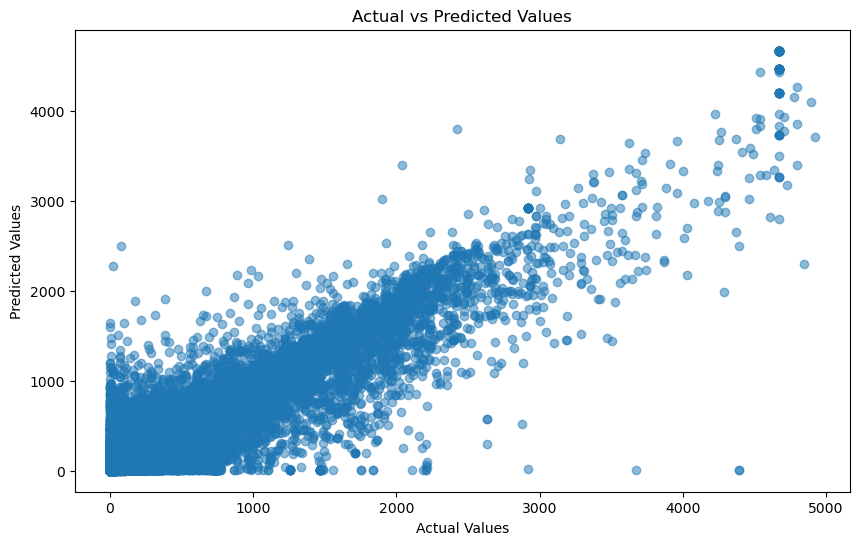

In [265]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [266]:
fire_duration_rf_rmse = mean_squared_error(best_model.predict(X_test), y_test)**(1/2)

In [267]:
fire_duration_rf_rmse

100.526922458108

### <center>FIRE CAUSE PREDICTION</center>

In [162]:
model_data = new_fires_data.drop(['DISCOVERY_DATE','DISCOVERY_TIME','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_CODE','FIPS_NAME'],axis=1)

model_data.columns

Index(['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'OWNER_DESCR', 'STATE',
       'FIPS_CODE', 'DISCOVERY_MONTH', 'DISCOVERY_DOW', 'DURATION_TIME_HRS',
       'DISCOVERY_AM_PM'],
      dtype='object')

In [163]:
unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

In [164]:
model_data.drop('DISCOVERY_AM_PM',axis=1, inplace=True)
X = model_data.drop(['STAT_CAUSE_DESCR'], axis=1)
y = model_data['STAT_CAUSE_DESCR']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

In [165]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [166]:
X_train

,FIRE_YEAR,FIRE_SIZE,OWNER_DESCR,STATE,FIPS_CODE,DISCOVERY_MONTH,DISCOVERY_DOW,DURATION_TIME_HRS
1080710,2012,0.50,BIA,MN,87,3,1,0.666667
997133,1995,1.00,MISSING/NOT SPECIFIED,AL,121,8,3,2.683333
578828,2001,12.00,MISSING/NOT SPECIFIED,MS,7,6,4,2.469298
729386,2002,2.00,MISSING/NOT SPECIFIED,NC,63,2,3,1.625000
811454,1997,1.00,MISSING/NOT SPECIFIED,MS,73,9,5,1.000000
...,...,...,...,...,...,...,...,...
375209,2008,0.16,MISSING/NOT SPECIFIED,GA,35,6,5,0.333333
839114,2010,0.64,PRIVATE,GA,277,12,3,12.742398
373814,2008,5.29,MISSING/NOT SPECIFIED,GA,91,10,2,0.621710
82857,1996,4.00,USFS,OR,23,7,0,21.650000


In [167]:
y_train.unique()

array([ 5,  1,  4,  3,  0,  7,  2, 10,  6,  8,  9], dtype=int64)

In [168]:
categorical_cols

Index(['OWNER_DESCR', 'STATE'], dtype='object')

In [169]:
numerical_cols

Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')

In [170]:
X_train

,FIRE_YEAR,FIRE_SIZE,OWNER_DESCR,STATE,FIPS_CODE,DISCOVERY_MONTH,DISCOVERY_DOW,DURATION_TIME_HRS
1080710,2012,0.50,BIA,MN,87,3,1,0.666667
997133,1995,1.00,MISSING/NOT SPECIFIED,AL,121,8,3,2.683333
578828,2001,12.00,MISSING/NOT SPECIFIED,MS,7,6,4,2.469298
729386,2002,2.00,MISSING/NOT SPECIFIED,NC,63,2,3,1.625000
811454,1997,1.00,MISSING/NOT SPECIFIED,MS,73,9,5,1.000000
...,...,...,...,...,...,...,...,...
375209,2008,0.16,MISSING/NOT SPECIFIED,GA,35,6,5,0.333333
839114,2010,0.64,PRIVATE,GA,277,12,3,12.742398
373814,2008,5.29,MISSING/NOT SPECIFIED,GA,91,10,2,0.621710
82857,1996,4.00,USFS,OR,23,7,0,21.650000


In [171]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [174]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fitting the model
log_reg_pipeline.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [182]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'new_fires_data' is your DataFrame
# Dropping unnecessary columns
model_data = new_fires_data.drop(['DISCOVERY_AM_PM','DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIPS_NAME'], axis=1)

# Mapping 'STAT_CAUSE_DESCR' to numerical values
unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

# Splitting the data into features and target
X = model_data.drop('STAT_CAUSE_DESCR', axis=1)
y = model_data['STAT_CAUSE_DESCR']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a pipeline with a logistic regression model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fitting the model
log_reg_pipeline.fit(X_train, y_train)
'''

"\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.linear_model import LogisticRegression\n\n# Assuming 'new_fires_data' is your DataFrame\n# Dropping unnecessary columns\nmodel_data = new_fires_data.drop(['DISCOVERY_AM_PM','DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIPS_NAME'], axis=1)\n\n# Mapping 'STAT_CAUSE_DESCR' to numerical values\nunique_values = model_data['STAT_CAUSE_DESCR'].unique()\nmapping_dict = {category: index for index, category in enumerate(unique_values)}\nmodel_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)\n\n# Splitting the data into features and target\nX = model_data.drop('STAT_CAUSE_DESCR', axis=1)\ny = model_data['ST

In [175]:
log_reg_pipeline.predict(X_test)

array([1, 4, 0, ..., 1, 4, 4], dtype=int64)

In [176]:
y_test

1159134    1
179478     1
151132     0
681009     3
517725     4
          ..
836645     1
868268     6
363988     1
517524     4
224017     4
Name: STAT_CAUSE_DESCR, Length: 226283, dtype: int64

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = log_reg_pipeline.predict(X_test)

In [178]:
cm = confusion_matrix(y_test, y_pred)

In [179]:
inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

In [180]:
labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]

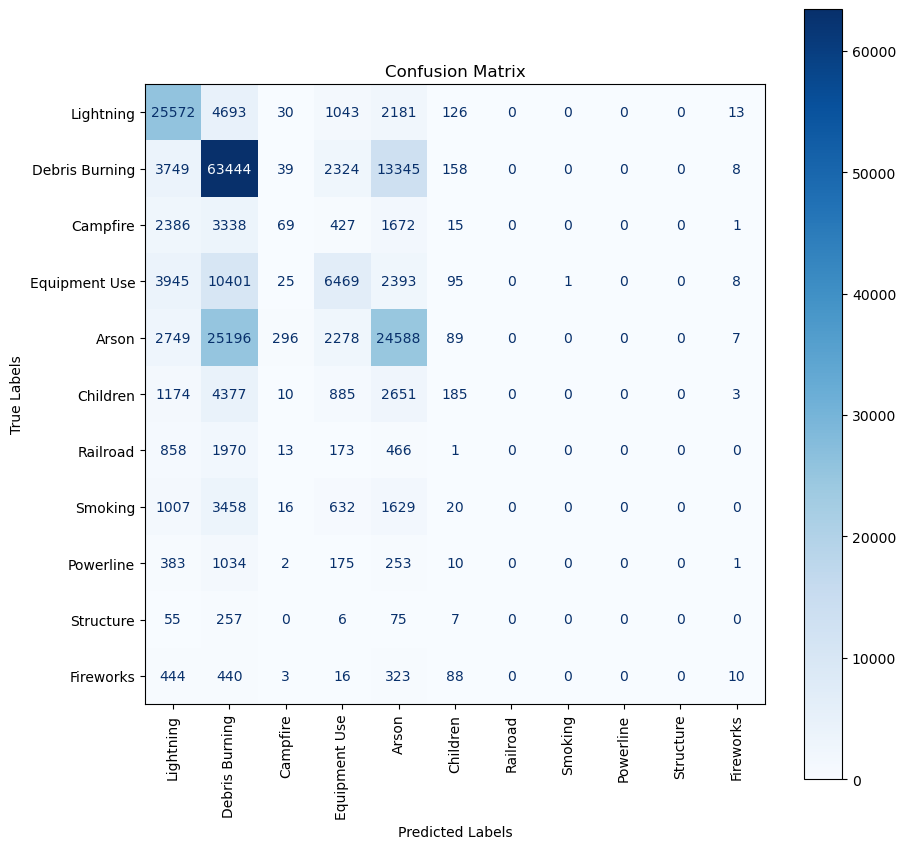

In [181]:

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [184]:
from sklearn.metrics import classification_report
print(classification_report(log_reg_pipeline.predict(X_test),y_test))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      0.60      0.67     42322
           1       0.76      0.53      0.63    118608
           2       0.01      0.14      0.02       503
           3       0.28      0.45      0.34     14428
           4       0.45      0.50      0.47     49576
           5       0.02      0.23      0.04       794
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.01      0.20      0.01        51

    accuracy                           0.53    226283
   macro avg       0.21      0.24      0.20    226283
weighted avg       0.66      0.53      0.58    226283



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'new_fires_data' is your DataFrame
# Dropping unnecessary columns
model_data = new_fires_data.drop(['DISCOVERY_AM_PM','DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIPS_NAME'], axis=1)

# Mapping 'STAT_CAUSE_DESCR' to numerical values
unique_values = model_data['STAT_CAUSE_DESCR'].unique()
mapping_dict = {category: index for index, category in enumerate(unique_values)}
model_data['STAT_CAUSE_DESCR'] = model_data['STAT_CAUSE_DESCR'].map(mapping_dict)

# Splitting the data into features and target
X = model_data.drop('STAT_CAUSE_DESCR', axis=1)
y = model_data['STAT_CAUSE_DESCR']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=79)

# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
# Creating a pipeline with a logistic regression model

In [185]:

dt_cls_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fitting the model
dt_cls_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

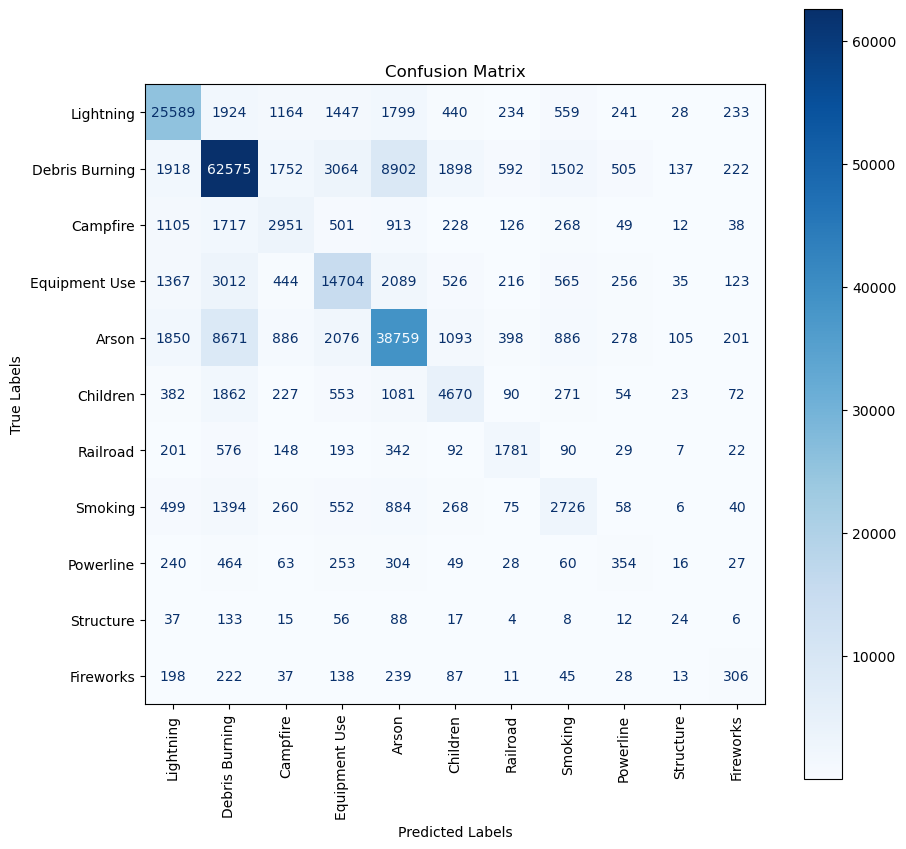

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = dt_cls_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]


fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [187]:
print(classification_report(dt_cls_pipeline.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     33386
           1       0.75      0.76      0.76     82550
           2       0.37      0.37      0.37      7947
           3       0.63      0.62      0.63     23537
           4       0.70      0.70      0.70     55400
           5       0.50      0.50      0.50      9368
           6       0.51      0.50      0.51      3555
           7       0.40      0.39      0.40      6980
           8       0.19      0.19      0.19      1864
           9       0.06      0.06      0.06       406
          10       0.23      0.24      0.23      1290

    accuracy                           0.68    226283
   macro avg       0.47      0.46      0.46    226283
weighted avg       0.68      0.68      0.68    226283



In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_cls_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10))
])

# Fitting the model
rf_cls_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FIRE_YEAR', 'FIRE_SIZE', 'FIPS_CODE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOW', 'DURATION_TIME_HRS'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNER_DESCR', 'STATE'], dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=10))])

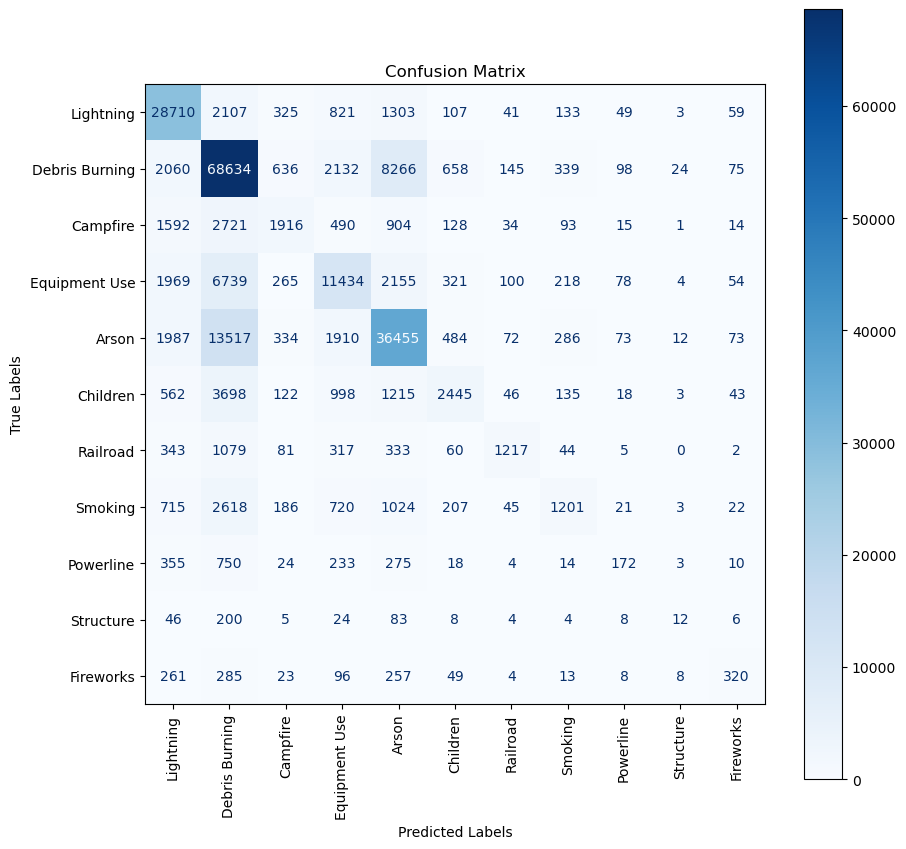

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf_cls_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

inverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

labels = [inverse_mapping_dict[i] for i in range(len(inverse_mapping_dict))]


fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels, rotation=90)
plt.show()


In [158]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(rf_cls_pipeline.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     38600
           1       0.83      0.67      0.74    102348
           2       0.24      0.49      0.32      3917
           3       0.49      0.60      0.54     19175
           4       0.66      0.70      0.68     52270
           5       0.26      0.55      0.36      4485
           6       0.35      0.71      0.47      1712
           7       0.18      0.48      0.26      2480
           8       0.09      0.32      0.14       545
           9       0.03      0.16      0.05        73
          10       0.24      0.47      0.32       678

    accuracy                           0.67    226283
   macro avg       0.38      0.54      0.42    226283
weighted avg       0.73      0.67      0.69    226283

